#Como se faz o treinamento de uma rede neural artificial?

Através de um processo iterativo de ajustes aplicado a seus pesos, o treinamento ocorre quando a rede neural atinge uma solução generalizada para uma classe de problemas.

#Explique a capacidade de generalização de uma rede neural artificial.

A capacidade de generalização esta
baseada no conhecimento aprendido. Significa que uma rede
neural vai conseguir produzir saídas adequadas para entradas não
observadas no seu processo de treinamento. 

#O que é perceptron?

Algoritmo de aprendizado supervisionado, uma função que pode decidir se uma entrada, representada por um vetor de números, pertence ou não a alguma classe específica, é organizado em três de camadas de unidades: sensoriais, associativas e geradoras de respostas. 

#Quais são os passos a serem seguidos para o treinamento de um perceptron?



1.   Inicialização dos Pesos
2.   Entrada de dados cuja a saida e conhecida
3.   Usar uma taxa de aprendizado entre 0 e 1
4.   Calcular a soma ponderada das amostras
5.   Calcular a ativação da rede conforme a função de ativação quadrada (-1;+1)
6.   Calcular o erro quadrático por amostra e o erro quadrático total
7.   Ajustar os pesos conforme os deltas
8.   Testar o criterio de parada



#O que significa taxa de aprendizado?

A taxa de aprendizado é uma constante de proporcionalidade no intervalo [0,1], este procedimento de aprendizado requer apenas que a mudança no peso seja proporcional.

#Como é feita a soma ponderada das entradas e dos pesos?

A saída intermediária d é calculada por meio do somatório da multiplicação entre cada entrada e seu peso. Assim:

d = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w0

#O que é função de ativação?

A saída ativada o depende do resultado da saída intermediária d. Caso o resultado obtido em d seja maior ou igual a zero, o será igual a +1; se d for menor que zero, o será igual a -1. Ou, em forma de pseudo-código:

In [ ]:
def saidaAtivada(d):
  if d >= 0:
    return 1
  return -1

#Como é feito o cálculo do erro?

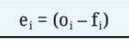
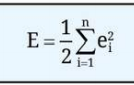
Ou, em forma de pseudo-código:

In [ ]:
def errorIndividual(o, f):
  return o - f

In [ ]:
def errorGlobal(e):
    return 0.5*somatorio(e) ** 2

#Por que se afirma que um conjunto de amostras é separável linearmente?

Conjunto de dados linearmente separáveis são aqueles que podem ser satisfeitos utilizando uma reta para obter uma perfeita classificação. Essa característica fica evidente quando plotamos as amostras como pontos em um gráfico de eixos cartesianos.

#Analise o seguinte conjunto de amostras e verifique se um perceptron pode classificá-los:
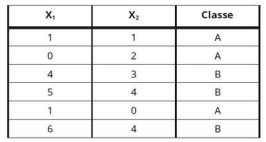




In [1]:
x1 , x2 = [1,0,4,5,1,6], [1,2,3,4,0,4]

In [2]:
o = [1, 1, -1, -1, 1, -1]

In [3]:
w = [1, 1, 1]

In [4]:
n = 0.01

In [5]:
def soma (w, x):
  d = w[0]
  for i in range(2):
    d += w[i+1]*x[i];
  return d

In [6]:
def saidaAtivada(d):
  if d >= 0:
    return 1
  return -1

In [7]:
def somatorio(numeros):
    soma = 0
    for i in numeros:
        soma = soma + i
    return soma

In [8]:
def errorIndividual(o, f):
  return o - f

In [9]:
def errorGlobal(e):
    return 0.5*somatorio(e) ** 2

In [10]:
e, delta1, delta2 = [], [], []
aux = -1
while aux < 0:
  e.clear()
  delta1.clear()
  delta2.clear()
  print('| x1 | x2 |  d      | f |  o  | Atual | Alvo  | e  | delta1 | delta2 |')
  for i in range(len(x1)):
    x = [x1[i], x2[i]]
    d = soma(w, x)
    f = saidaAtivada(soma(w, x))
    atual = 'A' if f > 0 else 'B'
    alvo = 'A' if o[i] > 0 else 'B'
    e.append(errorIndividual(o[i], f))
    delta1.append((n * e[i] * x1[i]))
    delta2.append((n * e[i] * x2[i]))
    linha = [x1[i],  x2[i],  d, f, o[i], atual ,alvo  ,e[i]  ,delta1[i] ,delta2[i]]
    print('| {:}  | {:}  |  {:.2f}  | {:} | {:>2}  |   {:}   |   {:}   | {:>2} |   {:>2,.2f}  |  {:>2,.2f}  |'.format(*linha))
  print(w)
  print('Erro Global:', errorGlobal(e))
  print('Erro Global ^2:',errorGlobal(e) ** 2)
  if (errorGlobal(e) ** 2) != 0:
    w[1] = w[1] + somatorio(delta1)
    w[2] = w[2] + somatorio(delta2)
  else:
    aux = 1

| x1 | x2 |  d      | f |  o  | Atual | Alvo  | e  | delta1 | delta2 |
| 1  | 1  |  3.00  | 1 |  1  |   A   |   A   |  0 |   0.00  |  0.00  |
| 0  | 2  |  3.00  | 1 |  1  |   A   |   A   |  0 |   0.00  |  0.00  |
| 4  | 3  |  8.00  | 1 | -1  |   A   |   B   | -2 |   -0.08  |  -0.06  |
| 5  | 4  |  10.00  | 1 | -1  |   A   |   B   | -2 |   -0.10  |  -0.08  |
| 1  | 0  |  2.00  | 1 |  1  |   A   |   A   |  0 |   0.00  |  0.00  |
| 6  | 4  |  11.00  | 1 | -1  |   A   |   B   | -2 |   -0.12  |  -0.08  |
[1, 1, 1]
Erro Global: 18.0
Erro Global ^2: 324.0
| x1 | x2 |  d      | f |  o  | Atual | Alvo  | e  | delta1 | delta2 |
| 1  | 1  |  2.48  | 1 |  1  |   A   |   A   |  0 |   0.00  |  0.00  |
| 0  | 2  |  2.56  | 1 |  1  |   A   |   A   |  0 |   0.00  |  0.00  |
| 4  | 3  |  6.14  | 1 | -1  |   A   |   B   | -2 |   -0.08  |  -0.06  |
| 5  | 4  |  7.62  | 1 | -1  |   A   |   B   | -2 |   -0.10  |  -0.08  |
| 1  | 0  |  1.70  | 1 |  1  |   A   |   A   |  0 |   0.00  |  0.00  |
| 6  | 4  |  8.

#O que é camada oculta?

Camada localizada entre a entrada e a saída do algoritmo, faz cálculos intermediários que auxiliam a rede a encontrar os valores finais. Em redes mais complexas, pode-se utilizar várias camadas ocultas entre a camada de entrada e saída.




#Analise o diagrama de uma rede neural do tipo perceptron da figura a seguir.
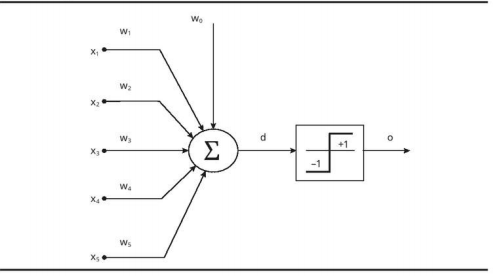
Agora, assinale com (V) as afirmações verdadeiras e com (F) as afirmações falsas:


(V) A rede neural em questão representa um perceptron simples.

(V) A função de ativação opera na faixa [0,1].

(V) O valor do somatório, representado pela variável d, é a soma ponderada das entradas x pelos pesos w mais o peso de desvio w0, ou seja, d = x1w1 + x2w2 + x3w3 + x4w4 + xsws + w0.

(F) A rede neural representada tem S entradas e 2 saídas.

(V) A saída o apresenta ou valor -1 ou valor +1.

#Considere que uma rede perceptron simples, com duas entradas e uma saída, sem camada oculta, apresenta valores de pesos e amostras conforme as tabelas a seguir: 
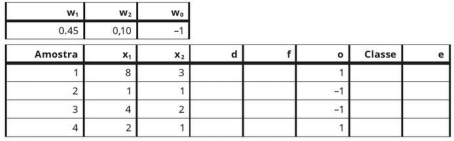


In [ ]:
x1, x2 = [8, 1, 4, 2], [3, 1, 2, 1]

In [ ]:
o = [1, -1, -1, 1]

In [ ]:
w = [-1, 0.45, 0.10]

##a) Calcule a soma ponderada das amostras, ou seja, a alimentação da rede a partir dos valores dos neurônios de entrada das amostras (preenchendo a coluna d).


In [ ]:
def soma (w, x):
  d = w[0]
  for i in range(2):
    d += w[i+1]*x[i];
  return d

In [ ]:
print('| x1 | x2 |  d      |')
for i in range(len(x1)):
  x = [x1[i], x2[i]]
  d = soma(w, x)
  linha = [x1[i],  x2[i],  d]
  print('| {:}  | {:}  |  {:.2f}  |'.format(*linha))

| x1 | x2 |  d      |
| 8  | 3  |  2.90  |
| 1  | 1  |  -0.45  |
| 4  | 2  |  1.00  |
| 2  | 1  |  0.00  |



##b) Calcule a ativação da rede conforme a função de ativação quadrada (-1;+1), preenchendo a coluna f.


In [ ]:
print('| x1 | x2 |  d      | f |  o  |')
for i in range(len(x1)):
  x = [x1[i], x2[i]]
  d = soma(w, x)
  f = saidaAtivada(soma(w, x))
  linha = [x1[i],  x2[i],  d, f, o[i]]
  print('| {:}  | {:}  |  {:.2f}  | {:} | {:>2}  |'.format(*linha))

| x1 | x2 |  d      | f |  o  |
| 8  | 3  |  2.90  | 1 |  1  |
| 1  | 1  |  -0.45  | -1 | -1  |
| 4  | 2  |  1.00  | 1 | -1  |
| 2  | 1  |  0.00  | 1 |  1  |



##c) Preencha a coluna Classe com “A”, caso a ativação seja maior ou igual a 1, ou “B”, caso a ativação seja menor que 1.


In [ ]:
print('| x1 | x2 |  d      | f |  o  | Atual |')
for i in range(len(x1)):
  x = [x1[i], x2[i]]
  d = soma(w, x)
  f = saidaAtivada(soma(w, x))
  atual = 'A' if f > 0 else 'B'
  linha = [x1[i],  x2[i],  d, f, o[i], atual]
  print('| {:}  | {:}  |  {:.2f}  | {:>2} | {:>2}  |  {:}   |'.format(*linha))

| x1 | x2 |  d      | f |  o  | Atual |
| 8  | 3  |  2.90  |  1 |  1  |  A   |
| 1  | 1  |  -0.45  | -1 | -1  |  B   |
| 4  | 2  |  1.00  |  1 | -1  |  A   |
| 2  | 1  |  0.00  |  1 |  1  |  A   |



##d) Calcule o erro quadrático por amostra e o erro quadrático total, preenchendo a coluna e.


In [ ]:
def errorIndividual(o, f):
  return o - f

In [ ]:
def errorGlobal(e):
    return 0.5*somatorio(e) ** 2

In [ ]:
e = []
print('| x1 | x2 |  d      | f |  o  | Atual || e  |')
for i in range(len(x1)):
  x = [x1[i], x2[i]]
  d = soma(w, x)
  f = saidaAtivada(soma(w, x))
  atual = 'A' if f > 0 else 'B'
  e.append(errorIndividual(o[i], f))
  linha = [x1[i],  x2[i],  d, f, o[i], atual, e[i]**2]
  print('| {:}  | {:}  |  {:.2f}  | {:>2} | {:>2}  |  {:}   | {:>2}  |'.format(*linha))
print('Erro Global:', errorGlobal(e))
print('Erro Global ^2:',errorGlobal(e) ** 2)

| x1 | x2 |  d      | f |  o  | Atual || e  |
| 8  | 3  |  2.90  |  1 |  1  |  A   |  0  |
| 1  | 1  |  -0.45  | -1 | -1  |  B   |  0  |
| 4  | 2  |  1.00  |  1 | -1  |  A   |  4  |
| 2  | 1  |  0.00  |  1 |  1  |  A   |  0  |
Erro Global: 2.0
Erro Global ^2: 4.0



##e) Elabore um gráfico, colocando a variável x1 no eixo horizontal e a variável x2 no eixo vertical, e plote nele as amostras. Esse problema de classificação é separável linearmente?


In [ ]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import numpy  as np

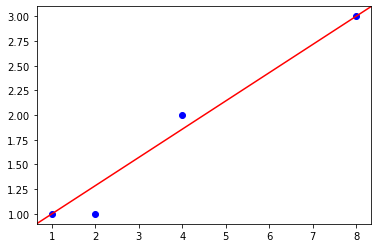

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.scatter(x1, x2, c='blue')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

SIM


##f) No exemplo anterior, calcule o fator de atualização dos pesos (delta) para cada variável de entrada das amostras, considerando uma taxa de atualização de 0,02 para o valor médio de cada fator. Quais serão os valores atualizados dos pesos para o próximo passo do treinamento?

In [ ]:
n = 0.02

In [ ]:
w = [-1, 0.45, 0.10]

In [ ]:
e, delta1, delta2 = [], [], []
print('| x1 | x2 |  d      | f |  o  | Atual | e  | delta1 | delta2 |')
for i in range(len(x1)):
  x = [x1[i], x2[i]]
  d = soma(w, x)
  f = saidaAtivada(soma(w, x))
  atual = 'A' if f > 0 else 'B'
  e.append(errorIndividual(o[i], f))
  delta1.append((n * e[i] * x1[i]))
  delta2.append((n * e[i] * x2[i]))
  linha = [x1[i],  x2[i],  d, f, o[i], atual, e[i]**2, delta1[i], delta2[i]]
  print('| {:}  | {:}  |  {:.2f}  | {:>2} | {:>2}  |  {:}   | {:>2}  |   {:>2,.2f}  |  {:>2,.2f}  |'.format(*linha))
print('Erro Global:', errorGlobal(e))
print('Erro Global ^2:',errorGlobal(e) ** 2)

| x1 | x2 |  d      | f |  o  | Atual | e  | delta1 | delta2 |
| 8  | 3  |  2.90  |  1 |  1  |  A   |  0  |   0.00  |  0.00  |
| 1  | 1  |  -0.45  | -1 | -1  |  B   |  0  |   0.00  |  0.00  |
| 4  | 2  |  1.00  |  1 | -1  |  A   |  4  |   -0.16  |  -0.08  |
| 2  | 1  |  0.00  |  1 |  1  |  A   |  0  |   0.00  |  0.00  |
Erro Global: 2.0
Erro Global ^2: 4.0


In [ ]:
#  Valor dos pesos
w[1] = w[1] + somatorio(delta1)
w[2] = w[2] + somatorio(delta2)
print('w0:',w[0],' w1:',w[1],' w2:',w[2])

w0: -1  w1: 0.29000000000000004  w2: 0.020000000000000004


#Faça o que foi solicitado no exercício anterior, porém com uma taxa de atualização de 0,01. De acordo com os valores obtidos para os pesos, é possível inferir que a rede convergirá mais lentamente?

In [ ]:
n = 0.01

In [ ]:
w = [-1, 0.45, 0.10]

In [ ]:
e, delta1, delta2 = [], [], []
print('| x1 | x2 |  d      | f |  o  | Atual | e  | delta1 | delta2 |')
for i in range(len(x1)):
  x = [x1[i], x2[i]]
  d = soma(w, x)
  f = saidaAtivada(soma(w, x))
  atual = 'A' if f > 0 else 'B'
  e.append(errorIndividual(o[i], f))
  delta1.append((n * e[i] * x1[i]))
  delta2.append((n * e[i] * x2[i]))
  linha = [x1[i],  x2[i],  d, f, o[i], atual, e[i]**2, delta1[i], delta2[i]]
  print('| {:}  | {:}  |  {:.2f}  | {:>2} | {:>2}  |  {:}   | {:>2}  |   {:>2,.2f}  |  {:>2,.2f}  |'.format(*linha))
print('Erro Global:', errorGlobal(e))
print('Erro Global ^2:',errorGlobal(e) ** 2)

| x1 | x2 |  d      | f |  o  | Atual | e  | delta1 | delta2 |
| 8  | 3  |  2.90  |  1 |  1  |  A   |  0  |   0.00  |  0.00  |
| 1  | 1  |  -0.45  | -1 | -1  |  B   |  0  |   0.00  |  0.00  |
| 4  | 2  |  1.00  |  1 | -1  |  A   |  4  |   -0.08  |  -0.04  |
| 2  | 1  |  0.00  |  1 |  1  |  A   |  0  |   0.00  |  0.00  |
Erro Global: 2.0
Erro Global ^2: 4.0


In [ ]:
#  Valor dos pesos
w[1] = w[1] + somatorio(delta1)
w[2] = w[2] + somatorio(delta2)
print('w0:',w[0],' w1:',w[1],' w2:',w[2])

w0: -1  w1: 0.37  w2: 0.060000000000000005


Sim, ele tera que realizar mais passos para chegar no resultado verdadeiro.

#Caso o perceptron anterior contenha uma camada oculta com 1 neurônio, quantos pesos haverá? E com 2 neurônios?

Com mais um neorônio haverá mais 4 pesos, pois terão mais 4 conexões, totalizando 6 pesos, e com 2 neorônios haverão 12 pesos.

